In [1]:
import os
import tweepy as tw
import pandas as pd
import math

import re
import nltk
from nltk.corpus import stopwords
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt

import collections
import itertools
from textblob import TextBlob

from socket import socket
import ssl
from requests.exceptions import Timeout, ConnectionError
from requests.packages.urllib3.exceptions import ReadTimeoutError, ProtocolError

import csv

import warnings
warnings.filterwarnings("ignore")


consumer_key='dUBhMzdBUyES8b5aOj5FZ1QP2'##Changed Keys 
consumer_secret='emsWamOq4SVNVf9b5cLOqUncen10slmXPt036vOh3Rw9IRR9xl'##Changed Keys 
access_token='1230514693674094593-AtxhZ7C3n9QlI0ZevlBPCds7lPs9Mc'##Changed Keys 
access_token_secret='rkpIruukE1xsT2vr4dE08q0HDECFIMOTXkrNY281qF9'##Changed Keys 

auth=tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tw.API(auth,wait_on_rate_limit=True,timeout=600)

#api.update_status("Tweet from python tweepy module!!!!")

#connected to twitter API - sent first tweet

In [2]:
search_words='corona+virus'
new_search=search_words + " -filter:retweets"
tweets=tw.Cursor(api.search,q=new_search, lang="en").items(10000)
all_tweets= [tweet.text for tweet in tweets]
all_tweets[:5]

['@Roy_Astro Dear Friends, our immune system is very important because it helps us fight back diseases and I hope we… https://t.co/bQGU9FqsN3',
 'Shoutout to the corona virus lmao cause of you I don’t have to take my AA classes🤣',
 '@ferdinandodanzi @RobertoBurioni @chetempochefa Dear Friends, our immune system is very important because it helps… https://t.co/2oLIoaR2HL',
 '@Naveen_Odisha May Lord bless us on this auspicious day and we win the war against the deadly Corona virus !',
 "Ok corona virus is taking over the world even alfie templeman's icon is using a face mask"]

In [3]:
def clean_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

all_tweets_no_urls = [clean_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['RoyAstro Dear Friends our immune system is very important because it helps us fight back diseases and I hope we',
 'Shoutout to the corona virus lmao cause of you I dont have to take my AA classes',
 'ferdinandodanzi RobertoBurioni chetempochefa Dear Friends our immune system is very important because it helps',
 'NaveenOdisha May Lord bless us on this auspicious day and we win the war against the deadly Corona virus',
 'Ok corona virus is taking over the world even alfie templemans icon is using a face mask']

In [4]:
words_in_tweet=[tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:5]

[['royastro',
  'dear',
  'friends',
  'our',
  'immune',
  'system',
  'is',
  'very',
  'important',
  'because',
  'it',
  'helps',
  'us',
  'fight',
  'back',
  'diseases',
  'and',
  'i',
  'hope',
  'we'],
 ['shoutout',
  'to',
  'the',
  'corona',
  'virus',
  'lmao',
  'cause',
  'of',
  'you',
  'i',
  'dont',
  'have',
  'to',
  'take',
  'my',
  'aa',
  'classes'],
 ['ferdinandodanzi',
  'robertoburioni',
  'chetempochefa',
  'dear',
  'friends',
  'our',
  'immune',
  'system',
  'is',
  'very',
  'important',
  'because',
  'it',
  'helps'],
 ['naveenodisha',
  'may',
  'lord',
  'bless',
  'us',
  'on',
  'this',
  'auspicious',
  'day',
  'and',
  'we',
  'win',
  'the',
  'war',
  'against',
  'the',
  'deadly',
  'corona',
  'virus'],
 ['ok',
  'corona',
  'virus',
  'is',
  'taking',
  'over',
  'the',
  'world',
  'even',
  'alfie',
  'templemans',
  'icon',
  'is',
  'using',
  'a',
  'face',
  'mask']]

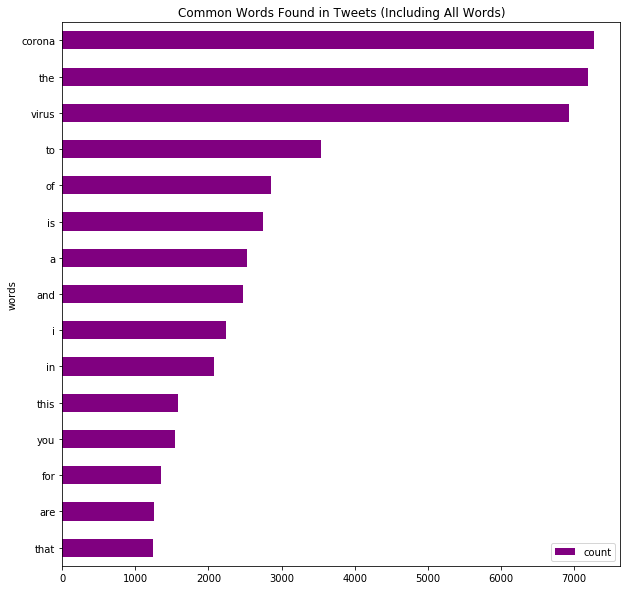

In [5]:
tweet_words= list(itertools.chain(*words_in_tweet))
tweet_words_count= collections.Counter(tweet_words)


clean_tweets_with_stopwords= pd.DataFrame(tweet_words_count.most_common(15), columns=['words','count'])

fig, ax=plt.subplots(figsize=(10,10))

clean_tweets_with_stopwords.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sand5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stop_words= set(stopwords.words('english'))

tweets_new =[[word for word in tweet_words if not word in stop_words] for tweet_words in words_in_tweet]
tweets_new[:5]

[['royastro',
  'dear',
  'friends',
  'immune',
  'system',
  'important',
  'helps',
  'us',
  'fight',
  'back',
  'diseases',
  'hope'],
 ['shoutout',
  'corona',
  'virus',
  'lmao',
  'cause',
  'dont',
  'take',
  'aa',
  'classes'],
 ['ferdinandodanzi',
  'robertoburioni',
  'chetempochefa',
  'dear',
  'friends',
  'immune',
  'system',
  'important',
  'helps'],
 ['naveenodisha',
  'may',
  'lord',
  'bless',
  'us',
  'auspicious',
  'day',
  'win',
  'war',
  'deadly',
  'corona',
  'virus'],
 ['ok',
  'corona',
  'virus',
  'taking',
  'world',
  'even',
  'alfie',
  'templemans',
  'icon',
  'using',
  'face',
  'mask']]

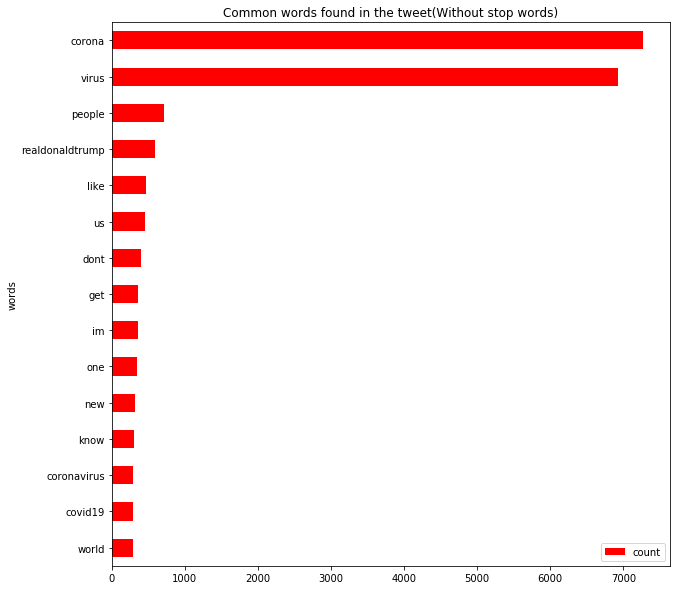

In [8]:
all_words= list(itertools.chain(*tweets_new))
count_words= collections.Counter(all_words)
#count_words.most_common(20)

clean_tweets= pd.DataFrame(count_words.most_common(15),columns=['words','count'])
clean_tweets

fig, ax= plt.subplots(figsize=(10,10))

clean_tweets.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="red")

ax.set_title("Common words found in the tweet(Without stop words)")

plt.show()

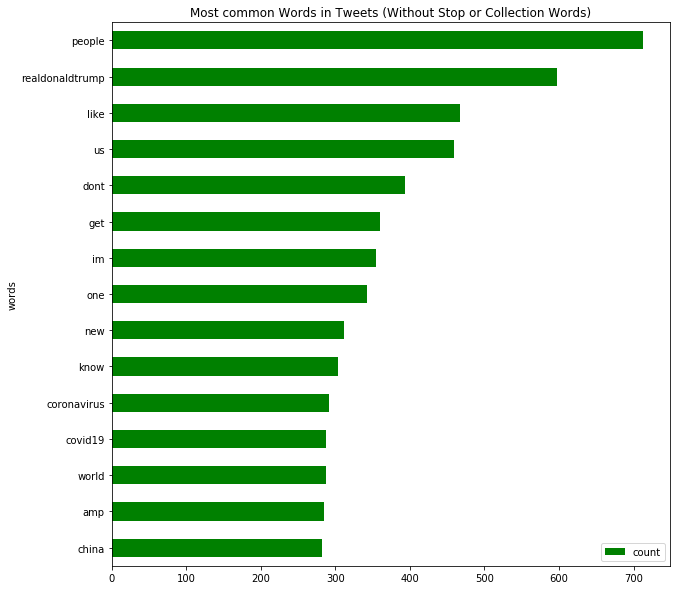

In [9]:
collection_words= ['corona', 'virus']

tweets_no_collection_words= [[tweet_no_collection_word for tweet_no_collection_word in word  
                             if not tweet_no_collection_word in collection_words] for word in tweets_new]

all_words_nc= list(itertools.chain(*tweets_no_collection_words))
count_words_nc= collections.Counter(all_words_nc)

#count_words_nc.most_common(15)

clean_tweets_nc=pd.DataFrame(count_words_nc.most_common(15), columns=['words','count'])

fig, ax=plt.subplots(figsize=(10,10))

ax.set_title("Most common Words in Tweets (Without Stop or Collection Words)")

clean_tweets_nc.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="green")

In [32]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS


def create_wordcloud(text):

    mask = np.array(Image.open("twitter_mask.png"))
    stopwords = set(STOPWORDS)

    wc = WordCloud(background_color="white", max_words=200, mask=mask, stopwords=stopwords)
    wc.generate(text)

    wc.to_file( "tm.png")

str2=" ".join(all_words)

create_wordcloud(str2)

In [10]:
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.26,RoyAstro Dear Friends our immune system is ver...
1,0.60,Shoutout to the corona virus lmao cause of you...
2,0.52,ferdinandodanzi RobertoBurioni chetempochefa D...
3,0.30,NaveenOdisha May Lord bless us on this auspici...
4,0.50,Ok corona virus is taking over the world even ...


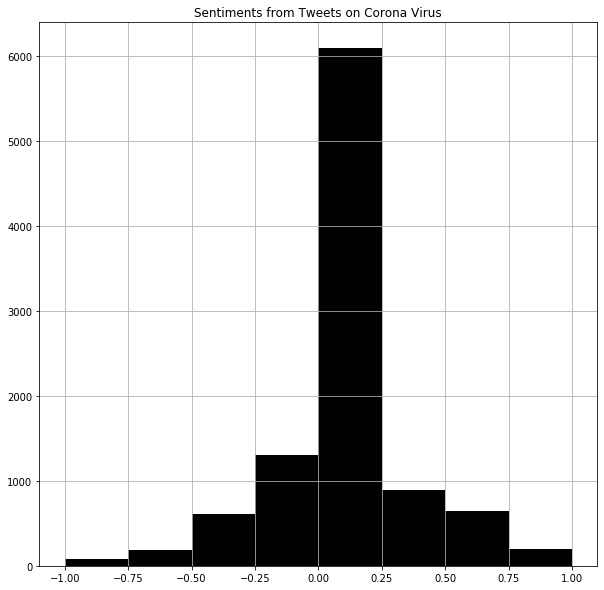

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1], ax=ax, color="black")

plt.title("Sentiments from Tweets on Corona Virus")
plt.show()

In [12]:
sentiment_df=sentiment_df[sentiment_df.polarity!= 0]
#sentiment_df.head()

fig, ax = plt.subplots(figsize=(10, 10))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1], ax=ax, color="black")

plt.title("Sentiments from Tweets on Corona Virus - without neutral tweets")
plt.show()

,polarity,tweet
0,0.26,RoyAstro Dear Friends our immune system is ver...
1,0.60,Shoutout to the corona virus lmao cause of you...
2,0.52,ferdinandodanzi RobertoBurioni chetempochefa D...
3,0.30,NaveenOdisha May Lord bless us on this auspici...
4,0.50,Ok corona virus is taking over the world even ...


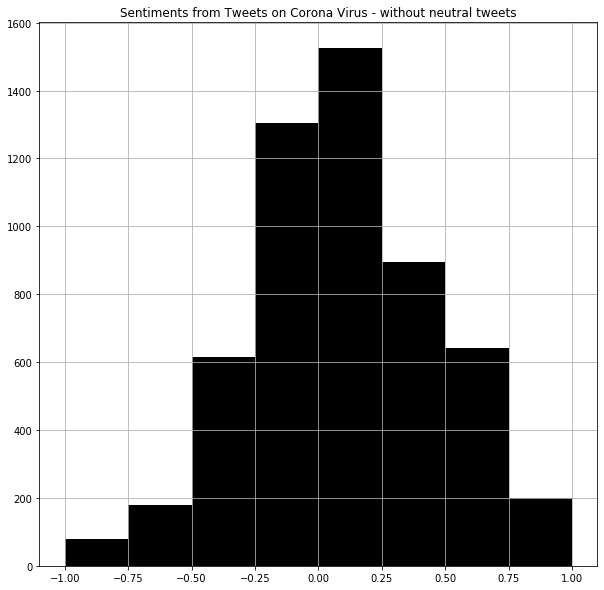

In [14]:
user_name="aakashb_95"

item= api.get_user(user_name)
print("name: " + item.name)
print("screen_name: " + item.screen_name)
print("description: " + item.description)
print("statuses_count: " + str(item.statuses_count))
print("friends_count: " + str(item.friends_count))
print("followers_count: " + str(item.followers_count))
print("account_created_date: "+ str(item.created_at))

user_tweet_count=item.statuses_count

name: Aakash Bakhle
screen_name: aakashb_95
description: Everyday photographer, observer.
statuses_count: 564
friends_count: 189
followers_count: 81
account_created_date: 2013-03-02 11:15:42


In [15]:
def get_friends(usr_name):
    friends = []
    for user in tw.Cursor(api.friends, screen_name=usr_name).items():
        friends.append(user.screen_name)
    return friends

['YoBlackPepper',
 'dailyherapheri',
 'bhaleraosarang',
 'AkkiMB5',
 'Sand5066',
 'naval',
 'salty__bae',
 'dansiddiqui',
 'MajorNeel',
 'NiTiSHmurthy',
 'AmbujaNaik',
 'labnol',
 'GappistanRadio',
 'JackMa',
 'deepigoyal',
 'Sassy_Soul_',
 'PTI_News',
 'ANI',
 'delhichatter',
 'itnamatsharma',
 'StephenAtHome',
 'IvankaTrump',
 'vikrantgupta73',
 'ErlingHaaland',
 'julesbreach',
 'FantasyFootyFix',
 'year_progress',
 'PPathole',
 'TusharJain_',
 'BenCrellin',
 'JamesClear',
 'sidin',
 'FFH_HQ',
 'Tesla',
 'jmj',
 'ReallySwara',
 'PuneCityPolice',
 'FPL_Partridge',
 'ladywithflaws',
 'LifeMathMoney',
 'Jaspritbumrah93',
 'varungrover',
 'warikoo',
 'saurabh_thakker',
 'hvgoenka',
 'MagnusCarlsen',
 'FFScout',
 'swatic12',
 'OptaJason',
 'indeed',
 'JonChampionJC',
 'mbatshuayi',
 'floydian_sleep',
 'NorthStandGang',
 'joybhattacharj',
 'BigManBakar',
 'tej95',
 'OOCBumble',
 'subodhgholve',
 'bhardwaj_rish',
 'DaithankarNinad',
 'theskindoctor13',
 'navaneethuk',
 'ThakkerSaurabh',
 't

In [17]:
def get_followers_list(usr_name):
    followers = []
    for user in tw.Cursor(api.followers, screen_name=usr_name).items():
        followers.append(user.screen_name)
    return followers

['AkshayIndalkar6',
 'AkkiMB5',
 'Sand5066',
 'salty__bae',
 'FFH_HQ',
 'notdeepblue',
 'R4G3xHOPE',
 'alisha_janrao',
 'DaithankarNinad',
 'tej95',
 'BakhleShrirang',
 'Amit28824553',
 'Manc43ver',
 'nambi4r',
 'MrOlalekun',
 'thespiceboysLFC',
 'BakhleVaishali',
 'Kaushik_agni',
 'ankur_khatal',
 'Shankydvs1',
 'veenabakhle_ab',
 'Aashishbakhle',
 'BPAL47401299',
 'abhideepj',
 'dheerajronkadi',
 'rushitpandyaa',
 'aphale_priyanka',
 'Malikas04332360',
 'aadityasoman',
 'thatsharmaboy',
 'IMohdiwale',
 'SanjayChheda5',
 'gandhhii',
 'BhavyanshM',
 'pranita369',
 'AChhajalane',
 'abhijitw143',
 'Caught__Offside',
 'Sachin18ht',
 'will_iamR',
 'noughtythoughts',
 'Chunit96',
 'TanmayeeK12',
 'nick_nikhil05',
 'desubha3181',
 'ShripadKulkarn9',
 'bulgakov_jurij',
 'abdulraqueeb',
 'UtkarshShinde9',
 'iamvk_333',
 'patilpushkarp',
 'vinay_chidri',
 'IRajviNahar',
 'choughule_apurv',
 'perfect_love360',
 'Dshantanu423',
 'MayankChidri',
 'MoorjaniPradee1',
 'RabariManoj',
 'Atharva463',
 

In [19]:
def get_user_tweets(usr_name):
    user_tweets= []
    for tweet in api.user_timeline(id=usr_name,count=200):
    #for tweet in tw.Cursor(api.user_timeline,id=usr_name).items():
        user_tweets.append(tweet.text)
    return user_tweets

In [20]:
#main_user_friends_list= []
main_user_friends_list=get_friends(user_name)
#main_user_friends_list
main_user_followers_list= get_followers_list(user_name)
#main_user_followers_list
main_user_tweets= get_user_tweets(user_name)
#main_user_tweets

['@nocontextunited @letmehandlek 😂😂😂😂',
 "3 years since #bedsforawayfans. Perhaps the most beautiful gesture I've witnessed live.\n@BVB https://t.co/MzD8uf13Av",
 '@RandomCricketP1 @mandar_94 @letmehandlek @thatsharmaboy',
 'RT @dailyherapheri: Indian parents to their kids during summer vacations https://t.co/5b9Yq7e14M',
 "RT @varungrover: Y'day while waiting to buy vegetables at the nearby sabzi stall - a couple just ahead of me made me realize (yet again) on…",
 'RT @mandar_94: There is no more any emotion attached to any of the days of the week 😂\nI no longer remember what a Monday or a Friday feels…',
 "If he were a guru today, he'd have his\nFlying drones masterclass.\n#DDNational #Mahabharata https://t.co/r9oQ0kSBuf",
 "RT @wawinaApr: Doggo wants to listen to unborn baby's heartbeat 😍❤🐶 \n\n(love_animalsgram) https://t.co/mQojnpTZsY",
 'https://t.co/aMSEuDfqUZ\n\nWhy an extended lockdown is a better option',
 'RT @ButVai: "There is a difference between walking the path and clean

In [21]:
def countsPerFollower(usr_name,usr_tweets, handle_name):
#     temp = []
    count = 0
    search_str = '@'+handle_name
    for tweet in usr_tweets:
        count += tweet.count(search_str)
#         temp.append((item.screen_name, handle_name, tweet.count(search_str)))
            
    return (usr_name, handle_name, count)

In [22]:
l = [countsPerFollower(user_name,main_user_tweets,i) for i in main_user_friends_list]
l

[('aakashb_95', 'YoBlackPepper', 0),
 ('aakashb_95', 'dailyherapheri', 1),
 ('aakashb_95', 'bhaleraosarang', 0),
 ('aakashb_95', 'AkkiMB5', 0),
 ('aakashb_95', 'Sand5066', 0),
 ('aakashb_95', 'naval', 0),
 ('aakashb_95', 'salty__bae', 0),
 ('aakashb_95', 'dansiddiqui', 0),
 ('aakashb_95', 'MajorNeel', 0),
 ('aakashb_95', 'NiTiSHmurthy', 0),
 ('aakashb_95', 'AmbujaNaik', 0),
 ('aakashb_95', 'labnol', 0),
 ('aakashb_95', 'GappistanRadio', 2),
 ('aakashb_95', 'JackMa', 0),
 ('aakashb_95', 'deepigoyal', 0),
 ('aakashb_95', 'Sassy_Soul_', 0),
 ('aakashb_95', 'PTI_News', 0),
 ('aakashb_95', 'ANI', 2),
 ('aakashb_95', 'delhichatter', 0),
 ('aakashb_95', 'itnamatsharma', 0),
 ('aakashb_95', 'StephenAtHome', 0),
 ('aakashb_95', 'IvankaTrump', 0),
 ('aakashb_95', 'vikrantgupta73', 0),
 ('aakashb_95', 'ErlingHaaland', 0),
 ('aakashb_95', 'julesbreach', 0),
 ('aakashb_95', 'FantasyFootyFix', 0),
 ('aakashb_95', 'year_progress', 3),
 ('aakashb_95', 'PPathole', 0),
 ('aakashb_95', 'TusharJain_', 0),

In [23]:
def get_common_friends(main_user_list, friend_friends_list):
    #print("length from common_friends main list:"+len(main_user_list))
    list1_as_set = set(main_user_list)
    intersection = list1_as_set.intersection(friend_friends_list)
    intersection_as_list = list(intersection)
    #print("Common friends: "+intersection_as_list)
    return intersection_as_list

In [24]:
def get_nodes_edges(start_range,end_range):
    chunk_list=main_user_friends_list[start_range:end_range]
    print(chunk_list)
    for i in range(len(chunk_list)):
        try:
            friend_friends= get_friends(chunk_list[i])
            print('Source node: '+chunk_list[i])
            print("**********************************")
            common_friends=get_common_friends(main_user_friends_list,friend_friends)
            #print(common_friends)
            if len(common_friends)!=0:
                friend_tweets= get_user_tweets(chunk_list[i])
                for j in range(len(common_friends)):
                    print('Destination node: '+common_friends[j])
                    friend_count= countsPerFollower(chunk_list[i],friend_tweets,common_friends[j])
                    #print(friend_count)
                    l.append(friend_count)
        except (Timeout, ssl.SSLError, ConnectionError, ReadTimeoutError, ProtocolError) as exc:
            time.sleep(10)
            print("error")

In [25]:
# run in batches of 10 to avoid connection timeout
get_nodes_edges(131,140)
len(l)
l

['ChanakyaGaur', 'AksharPathak', 'MayankChidri', 'Bhuvan_Bam', 'thetanmay', 'kalyanrath', 'AudiPhotography', 'richardbranson', 'elonmusk']
Source node: ChanakyaGaur
**********************************
Destination node: SahilBulla
Destination node: one_by_two
Destination node: kalyanrath
Destination node: elonmusk
Destination node: FarOutAkhtar
Destination node: aamir_khan
Destination node: NASA
Destination node: KananGill
Destination node: TheBanat
Destination node: thevirdas
Destination node: RNTata2000
Destination node: sapanv
Destination node: Google
Destination node: knowkenny
Destination node: abdulraqueeb
Destination node: thetanmay
Destination node: sachin_rt
Destination node: AllIndiaBakchod
Destination node: PMOIndia
Destination node: BillGates
Destination node: LeoDiCaprio
Destination node: TheEconomist
Destination node: isro
Source node: AksharPathak
**********************************
Destination node: SahilBulla
Destination node: rahulroushan
Destination node: dailyherapheri

[('aakashb_95', 'YoBlackPepper', 0),
 ('aakashb_95', 'dailyherapheri', 1),
 ('aakashb_95', 'bhaleraosarang', 0),
 ('aakashb_95', 'AkkiMB5', 0),
 ('aakashb_95', 'Sand5066', 0),
 ('aakashb_95', 'naval', 0),
 ('aakashb_95', 'salty__bae', 0),
 ('aakashb_95', 'dansiddiqui', 0),
 ('aakashb_95', 'MajorNeel', 0),
 ('aakashb_95', 'NiTiSHmurthy', 0),
 ('aakashb_95', 'AmbujaNaik', 0),
 ('aakashb_95', 'labnol', 0),
 ('aakashb_95', 'GappistanRadio', 2),
 ('aakashb_95', 'JackMa', 0),
 ('aakashb_95', 'deepigoyal', 0),
 ('aakashb_95', 'Sassy_Soul_', 0),
 ('aakashb_95', 'PTI_News', 0),
 ('aakashb_95', 'ANI', 2),
 ('aakashb_95', 'delhichatter', 0),
 ('aakashb_95', 'itnamatsharma', 0),
 ('aakashb_95', 'StephenAtHome', 0),
 ('aakashb_95', 'IvankaTrump', 0),
 ('aakashb_95', 'vikrantgupta73', 0),
 ('aakashb_95', 'ErlingHaaland', 0),
 ('aakashb_95', 'julesbreach', 0),
 ('aakashb_95', 'FantasyFootyFix', 0),
 ('aakashb_95', 'year_progress', 3),
 ('aakashb_95', 'PPathole', 0),
 ('aakashb_95', 'TusharJain_', 0),

In [33]:

l= [('aakashb_95', 'dailyherapheri', 1),
 ('aakashb_95', 'bhaleraosarang', 0),
 ('aakashb_95', 'AkkiMB5', 0),
 ('aakashb_95', 'Sand5066', 0),
 ('aakashb_95', 'naval', 0),
 ('aakashb_95', 'salty__bae', 0),
 ('aakashb_95', 'dansiddiqui', 0),
 ('aakashb_95', 'MajorNeel', 0),
 ('aakashb_95', 'NiTiSHmurthy', 0),
 ('aakashb_95', 'AmbujaNaik', 0),
 ('aakashb_95', 'labnol', 0),
 ('aakashb_95', 'GappistanRadio', 2),
 ('aakashb_95', 'JackMa', 0),
 ('aakashb_95', 'deepigoyal', 0),
 ('aakashb_95', 'Sassy_Soul_', 0),
 ('aakashb_95', 'PTI_News', 0),
 ('aakashb_95', 'ANI', 2),
 ('aakashb_95', 'delhichatter', 0),
 ('aakashb_95', 'itnamatsharma', 0),
 ('aakashb_95', 'StephenAtHome', 0),
 ('aakashb_95', 'IvankaTrump', 0),
 ('aakashb_95', 'vikrantgupta73', 0),
 ('aakashb_95', 'ErlingHaaland', 0),
 ('aakashb_95', 'julesbreach', 0),
 ('aakashb_95', 'FantasyFootyFix', 0),
 ('aakashb_95', 'year_progress', 3),
 ('aakashb_95', 'PPathole', 0),
 ('aakashb_95', 'TusharJain_', 0),
 ('aakashb_95', 'BenCrellin', 0),
 ('aakashb_95', 'JamesClear', 1),
 ('aakashb_95', 'sidin', 0),
 ('aakashb_95', 'FFH_HQ', 1),
 ('aakashb_95', 'Tesla', 0),
 ('aakashb_95', 'jmj', 0),
 ('aakashb_95', 'ReallySwara', 0),
 ('aakashb_95', 'PuneCityPolice', 1),
 ('aakashb_95', 'FPL_Partridge', 1),
 ('aakashb_95', 'ladywithflaws', 0),
 ('aakashb_95', 'LifeMathMoney', 0),
 ('aakashb_95', 'Jaspritbumrah93', 0),
 ('aakashb_95', 'varungrover', 1),
 ('aakashb_95', 'warikoo', 0),
 ('aakashb_95', 'saurabh_thakker', 0),
 ('aakashb_95', 'hvgoenka', 0),
 ('aakashb_95', 'MagnusCarlsen', 0),
 ('aakashb_95', 'FFScout', 0),
 ('aakashb_95', 'swatic12', 0),
 ('aakashb_95', 'OptaJason', 0),
 ('aakashb_95', 'indeed', 0),
 ('aakashb_95', 'JonChampionJC', 0),
 ('aakashb_95', 'mbatshuayi', 0),
 ('aakashb_95', 'floydian_sleep', 0),
 ('aakashb_95', 'NorthStandGang', 0),
 ('aakashb_95', 'joybhattacharj', 3),
 ('aakashb_95', 'BigManBakar', 7),
 ('aakashb_95', 'tej95', 0),
 ('aakashb_95', 'OOCBumble', 0),
 ('aakashb_95', 'subodhgholve', 0),
 ('aakashb_95', 'bhardwaj_rish', 0),
 ('aakashb_95', 'DaithankarNinad', 0),
 ('aakashb_95', 'theskindoctor13', 3),
 ('aakashb_95', 'navaneethuk', 0),
 ('aakashb_95', 'ThakkerSaurabh', 0),
 ('aakashb_95', 'thespiceboysLFC', 0),
 ('aakashb_95', 'nocontextunited', 1),
 ('aakashb_95', 'outofcontextars', 0),
 ('aakashb_95', 'Diff_KnockFC', 0),
 ('aakashb_95', 'irbishi', 0),
 ('aakashb_95', 'OptaJoe', 0),
 ('aakashb_95', 'jimbeglin', 3),
 ('aakashb_95', 'ASRomaEN', 0),
 ('aakashb_95', 'MikeHaysman', 0),
 ('aakashb_95', 'nambi4r', 3),
 ('aakashb_95', 'ChangiAirport', 0),
 ('aakashb_95', 'ClaytonMurzello', 0),
 ('aakashb_95', 'arthur3486', 0),
 ('aakashb_95', 'PRybitskyi', 0),
 ('aakashb_95', 'Bamanador', 0),
 ('aakashb_95', 'OwlyForAndroid', 0),
 ('aakashb_95', 'aviralrashtriya', 0),
 ('aakashb_95', 'netanyahu', 0),
 ('aakashb_95', 'FPLGeneral', 4),
 ('aakashb_95', 'vinitmasram', 0),
 ('aakashb_95', 'thebharatarmy', 0),
 ('aakashb_95', 'Aashishbakhle', 2),
 ('aakashb_95', 'nicketronix', 0),
 ('aakashb_95', 'cmrlofficial', 0),
 ('aakashb_95', 'Paytmcare', 0),
 ('aakashb_95', 'SingaporeCAAS', 0),
 ('aakashb_95', 'krtgrphr', 0),
 ('aakashb_95', 'Swannyg66', 0),
 ('aakashb_95', 'BumbleCricket', 0),
 ('aakashb_95', 'existentialcoms', 0),
 ('aakashb_95', 'abhideepj', 2),
 ('aakashb_95', 'thatsharmaboy', 15),
 ('aakashb_95', 'punitsoni', 0),
 ('aakashb_95', 'ShettyRupin', 0),
 ('aakashb_95', 'ButVai', 1),
 ('aakashb_95', 'SpaceX', 0),
 ('aakashb_95', 'Atheist_Krishna', 0),
 ('aakashb_95', 'anuja_shikhare', 0),
 ('aakashb_95', 'KellySomers', 0),
 ('aakashb_95', 'abdulraqueeb', 0),
 ('aakashb_95', 'OfficialFPL', 9),
 ('aakashb_95', 'hardikpandya7', 0),
 ('aakashb_95', 'sundarpichai', 0),
 ('aakashb_95', 'Being_Humor', 1),
 ('aakashb_95', 'RoflGandhi_', 0),
 ('aakashb_95', 'GaryLineker', 1),
 ('aakashb_95', 'rahulroushan', 2),
 ('aakashb_95', 'alanwilkins22', 0),
 ('aakashb_95', 'coolfunnytshirt', 0),
 ('aakashb_95', 'will_iamR', 0),
 ('aakashb_95', 'TheTweetOfGod', 1),
 ('aakashb_95', 'TheFifthSlip', 0),
 ('aakashb_95', 'rameshsrivats', 0),
 ('aakashb_95', 'ODDSbible', 1),
 ('aakashb_95', 'ShitIndiansSay', 0),
 ('aakashb_95', 'CarryMinati', 0),
 ('aakashb_95', 'TTuchelofficial', 0),
 ('aakashb_95', 'zenlabsfitness', 0),
 ('aakashb_95', 'woodyinho', 0),
 ('aakashb_95', 'BVB', 1),
 ('aakashb_95', 'cricketwallah', 0),
 ('aakashb_95', 'AllIndiaBakchod', 0),
 ('aakashb_95', 'thevirdas', 0),
 ('aakashb_95', 'cheteshwar1', 0),
 ('aakashb_95', 'Brandonwoelfel', 0),
 ('aakashb_95', 'isro', 0),
 ('aakashb_95', 'ManUtd', 0),
 ('aakashb_95', 'ChanakyaGaur', 0),
 ('aakashb_95', 'AksharPathak', 3),
 ('aakashb_95', 'MayankChidri', 0),
 ('aakashb_95', 'Bhuvan_Bam', 0),
 ('aakashb_95', 'thetanmay', 0),
 ('aakashb_95', 'kalyanrath', 0),
 ('aakashb_95', 'AudiPhotography', 3),
 ('aakashb_95', 'richardbranson', 0),
 ('aakashb_95', 'elonmusk', 0),
 ('aakashb_95', 'MKBHD', 1),
 ('aakashb_95', 'KananGill', 0),
 ('aakashb_95', 'knowkenny', 0),
 ('aakashb_95', 'mohanstatsman', 0),
 ('aakashb_95', 'oneplus', 0),
 ('aakashb_95', 'OnePlus_IN', 1),
 ('aakashb_95', 'MClarke23', 0),
 ('aakashb_95', 'msdhoni', 0),
 ('aakashb_95', 'FarOutAkhtar', 0),
 ('aakashb_95', 'washingtonpost', 0),
 ('aakashb_95', 'LeoDiCaprio', 0),
 ('aakashb_95', 'makeinindia', 0),
 ('aakashb_95', 'Google', 0),
 ('aakashb_95', 'PMOIndia', 0),
 ('aakashb_95', 'RNTata2000', 0),
 ('aakashb_95', 'manoharparrikar', 0),
 ('aakashb_95', 'BillGates', 0),
 ('aakashb_95', 'IndianExpress', 0),
 ('aakashb_95', 'IndiaToday', 0),
 ('aakashb_95', 'BBCWorld', 0),
 ('aakashb_95', 'ashwinravi99', 3),
 ('aakashb_95', 'imVkohli', 1),
 ('aakashb_95', 'HumorouslyVipul', 0),
 ('aakashb_95', 'SahilBulla', 0),
 ('aakashb_95', 'one_by_two', 0),
 ('aakashb_95', 'sapanv', 0),
 ('aakashb_95', 'TheBanat', 1),
 ('aakashb_95', 'htTweets', 0),
 ('aakashb_95', 'toi', 0),
 ('aakashb_95', 'EconomicTimes', 0),
 ('aakashb_95', 'timesofindia', 0),
 ('aakashb_95', 'FinancialTimes', 0),
 ('aakashb_95', 'TheEconomist', 0),
 ('aakashb_95', 'WSJ', 0),
 ('aakashb_95', 'letmehandlek', 4),
 ('aakashb_95', 'ArsenalHindi', 0),
 ('aakashb_95', 'ndtv', 0),
 ('aakashb_95', 'narendramodi', 3),
 ('aakashb_95', 'bomanirani', 0),
 ('aakashb_95', 'mandar_94', 3),
 ('aakashb_95', 'SrBachchan', 0),
 ('aakashb_95', 'Cristiano', 1),
 ('aakashb_95', 'WayneRooney', 0),
 ('aakashb_95', 'sachin_rt', 0),
 ('aakashb_95', 'aamir_khan', 0),
 ('aakashb_95', 'ESPNcricinfo', 0),
 ('aakashb_95', 'bhogleharsha', 3),
 ('aakashb_95', 'NASA', 0),
 ('aakashb_95', 'arrahman', 0),
 ('bhaleraosarang', 'alanwilkins22', 0),
 ('bhaleraosarang', 'bhogleharsha', 6),
 ('bhaleraosarang', 'joybhattacharj', 4),
 ('bhaleraosarang', 'NorthStandGang', 0),
 ('bhaleraosarang', 'sachin_rt', 2),
 ('bhaleraosarang', 'mohanstatsman', 1),
 ('bhaleraosarang', 'ESPNcricinfo', 0),
 ('AkkiMB5', 'OnePlus_IN', 0),
 ('AkkiMB5', 'elonmusk', 1),
 ('AkkiMB5', 'PMOIndia', 0),
 ('AkkiMB5', 'FarOutAkhtar', 0),
 ('AkkiMB5', 'Tesla', 0),
 ('AkkiMB5', 'thetanmay', 0),
 ('AkkiMB5', 'AksharPathak', 3),
 ('AkkiMB5', 'thevirdas', 2),
 ('AkkiMB5', 'RNTata2000', 0),
 ('AkkiMB5', 'richardbranson', 0),
 ('AkkiMB5', 'narendramodi', 1),
 ('AkkiMB5', 'kalyanrath', 0),
 ('AkkiMB5', 'SrBachchan', 0),
 ('AkkiMB5', 'arrahman', 0),
 ('AkkiMB5', 'BillGates', 0),
 ('AkkiMB5', 'varungrover', 0),
 ('AkkiMB5', 'sachin_rt', 0),
 ('AkkiMB5', 'oneplus', 1),
 ('AkkiMB5', 'JackMa', 0),
 ('AkkiMB5', 'deepigoyal', 0),
 ('AkkiMB5', 'imVkohli', 0),
 ('AkkiMB5', 'KananGill', 0),
 ('AkkiMB5', 'MKBHD', 0),
 ('AkkiMB5', 'JamesClear', 0),
 ('AkkiMB5', 'knowkenny', 0),
 ('AkkiMB5', 'Google', 1),
 ('AkkiMB5', 'aamir_khan', 0),
 ('salty__bae', 'elonmusk', 0),
 ('salty__bae', 'EconomicTimes', 0),
 ('salty__bae', 'HumorouslyVipul', 0),
 ('salty__bae', 'TheTweetOfGod', 0),
 ('salty__bae', 'knowkenny', 0),
 ('salty__bae', 'PMOIndia', 2),
 ('salty__bae', 'narendramodi', 0),
 ('dansiddiqui', 'BBCWorld', 0),
 ('dansiddiqui', 'ANI', 0),
 ('dansiddiqui', 'htTweets', 0),
 ('dansiddiqui', 'AllIndiaBakchod', 0),
 ('dansiddiqui', 'PTI_News', 0),
 ('dansiddiqui', 'TheTweetOfGod', 0),
 ('dansiddiqui', 'RoflGandhi_', 0),
 ('dansiddiqui', 'bhogleharsha', 0),
 ('dansiddiqui', 'GappistanRadio', 0),
 ('dansiddiqui', 'ndtv', 0),
 ('dansiddiqui', 'rameshsrivats', 0),
 ('dansiddiqui', 'PMOIndia', 1),
 ('dansiddiqui', 'narendramodi', 1),
 ('dansiddiqui', 'WSJ', 5),
 ('dansiddiqui', 'timesofindia', 0),
 ('dansiddiqui', 'TheEconomist', 0),
 ('dansiddiqui', 'IndianExpress', 0),
 ('dansiddiqui', 'washingtonpost', 1),
 ('MajorNeel', 'coolfunnytshirt', 1),
 ('MajorNeel', 'theskindoctor13', 26),
 ('MajorNeel', 'Being_Humor', 0),
 ('NiTiSHmurthy', 'SrBachchan', 7),
 ('NiTiSHmurthy', 'elonmusk', 0),
 ('NiTiSHmurthy', 'AksharPathak', 0),
 ('NiTiSHmurthy', 'Brandonwoelfel', 0),
 ('NiTiSHmurthy', 'AudiPhotography', 0),
 ('NiTiSHmurthy', 'MKBHD', 0),
 ('NiTiSHmurthy', 'labnol', 0),
 ('NiTiSHmurthy', 'sidin', 0),
 ('NiTiSHmurthy', 'bomanirani', 1),
 ('NiTiSHmurthy', 'sachin_rt', 0),
 ('NiTiSHmurthy', 'Google', 0),
 ('NiTiSHmurthy', 'naval', 0),
 ('NiTiSHmurthy', 'rameshsrivats', 0),
 ('NiTiSHmurthy', 'makeinindia', 0),
 ('NiTiSHmurthy', 'MajorNeel', 0),
 ('AmbujaNaik', 'elonmusk', 0),
 ('AmbujaNaik', 'TheEconomist', 0),
 ('AmbujaNaik', 'FarOutAkhtar', 0),
 ('AmbujaNaik', 'thetanmay', 0),
 ('AmbujaNaik', 'IndiaToday', 0),
 ('AmbujaNaik', 'thevirdas', 0),
 ('AmbujaNaik', 'bhogleharsha', 0),
 ('AmbujaNaik', 'richardbranson', 0),
 ('AmbujaNaik', 'narendramodi', 0),
 ('AmbujaNaik', 'SrBachchan', 0),
 ('AmbujaNaik', 'AllIndiaBakchod', 0),
 ('AmbujaNaik', 'sidin', 0),
 ('AmbujaNaik', 'sachin_rt', 0),
 ('AmbujaNaik', 'sapanv', 0),
 ('AmbujaNaik', 'PTI_News', 0),
 ('AmbujaNaik', 'htTweets', 0),
 ('AmbujaNaik', 'KananGill', 0),
 ('AmbujaNaik', 'knowkenny', 0),
 ('AmbujaNaik', 'aamir_khan', 0),
 ('GappistanRadio', 'thetanmay', 0),
 ('GappistanRadio', 'imVkohli', 0),
 ('GappistanRadio', 'AllIndiaBakchod', 0),
 ('GappistanRadio', 'HumorouslyVipul', 0),
 ('GappistanRadio', 'ANI', 0),
 ('GappistanRadio', 'elonmusk', 1),
 ('GappistanRadio', 'bhogleharsha', 0),
 ('GappistanRadio', 'rahulroushan', 7),
 ('GappistanRadio', 'ashwinravi99', 0),
 ('GappistanRadio', 'sidin', 0),
 ('GappistanRadio', 'GaryLineker', 0),
 ('GappistanRadio', 'varungrover', 0),
 ('GappistanRadio', 'coolfunnytshirt', 1),
 ('GappistanRadio', 'mohanstatsman', 0),
 ('GappistanRadio', 'rameshsrivats', 0),
 ('GappistanRadio', 'ladywithflaws', 3),
 ('GappistanRadio', 'Being_Humor', 0),
 ('GappistanRadio', 'MagnusCarlsen', 0),
 ('deepigoyal', 'thetanmay', 0),
 ('deepigoyal', 'AksharPathak', 0),
 ('deepigoyal', 'HumorouslyVipul', 0),
 ('deepigoyal', 'punitsoni', 0),
 ('deepigoyal', 'warikoo', 0),
 ('Sassy_Soul_', 'imVkohli', 7),
 ('Sassy_Soul_', 'HumorouslyVipul', 0),
 ('Sassy_Soul_', 'Atheist_Krishna', 0),
 ('Sassy_Soul_', 'msdhoni', 0),
 ('Sassy_Soul_', 'sachin_rt', 0),
 ('Sassy_Soul_', 'delhichatter', 0),
 ('Sassy_Soul_', 'swatic12', 0),
 ('Sassy_Soul_', 'narendramodi', 2),
 ('Sassy_Soul_', 'ladywithflaws', 0),
 ('Sassy_Soul_', 'Being_Humor', 1),
 ('delhichatter', 'SrBachchan', 0),
 ('delhichatter', 'ANI', 0),
 ('delhichatter', 'Sassy_Soul_', 0),
 ('delhichatter', 'Atheist_Krishna', 0),
 ('delhichatter', 'rahulroushan', 0),
 ('delhichatter', 'coolfunnytshirt', 0),
 ('delhichatter', 'theskindoctor13', 0),
 ('delhichatter', 'swatic12', 0),
 ('delhichatter', 'ladywithflaws', 0),
 ('delhichatter', 'Being_Humor', 2),
 ('itnamatsharma', 'AksharPathak', 0),
 ('itnamatsharma', 'EconomicTimes', 0),
 ('itnamatsharma', 'ReallySwara', 0),
 ('itnamatsharma', 'TheTweetOfGod', 0),
 ('itnamatsharma', 'floydian_sleep', 0),
 ('itnamatsharma', 'NASA', 0),
 ('itnamatsharma', 'TheEconomist', 0),
 ('vikrantgupta73', 'SrBachchan', 0),
 ('vikrantgupta73', 'htTweets', 0),
 ('vikrantgupta73', 'ANI', 0),
 ('vikrantgupta73', 'PTI_News', 2),
 ('vikrantgupta73', 'imVkohli', 1),
 ('vikrantgupta73', 'IndiaToday', 7),
 ('vikrantgupta73', 'ashwinravi99', 0),
 ('vikrantgupta73', 'msdhoni', 1),
 ('vikrantgupta73', 'sachin_rt', 2),
 ('vikrantgupta73', 'narendramodi', 36),
 ('vikrantgupta73', 'timesofindia', 0),
 ('vikrantgupta73', 'MClarke23', 3),
 ('vikrantgupta73', 'IndianExpress', 0),
 ('vikrantgupta73', 'ESPNcricinfo', 0),
 ('ErlingHaaland', 'woodyinho', 0),
 ('ErlingHaaland', 'BVB', 1),
 ('julesbreach', 'FFScout', 3),
 ('julesbreach', 'OfficialFPL', 6),
 ('julesbreach', 'Swannyg66', 0),
 ('julesbreach', 'GaryLineker', 0),
 ('julesbreach', 'JonChampionJC', 0),
 ('julesbreach', 'KellySomers', 2),
 ('julesbreach', 'ODDSbible', 0),
 ('julesbreach', 'ASRomaEN', 0),
 ('julesbreach', 'Cristiano', 0),
 ('julesbreach', 'BenCrellin', 0),
 ('julesbreach', 'FPLGeneral', 4),
 ('FantasyFootyFix', 'elonmusk', 0),
 ('FantasyFootyFix', 'ManUtd', 1),
 ('FantasyFootyFix', 'OfficialFPL', 1),
 ('FantasyFootyFix', 'FFH_HQ', 0),
 ('FantasyFootyFix', 'OptaJoe', 0),
 ('FantasyFootyFix', 'BenCrellin', 0),
 ('FantasyFootyFix', 'FPLGeneral', 0),
 ('PPathole', 'elonmusk', 189),
 ('PPathole', 'sundarpichai', 0),
 ('PPathole', 'BillGates', 0),
 ('PPathole', 'MKBHD', 0),
 ('PPathole', 'isro', 0),
 ('PPathole', 'Google', 0),
 ('PPathole', 'NASA', 0),
 ('PPathole', 'naval', 0),
 ('PPathole', 'SpaceX', 4),
 ('PPathole', 'Tesla', 33),
 ('PPathole', 'oneplus', 0),
 ('TusharJain_', 'elonmusk', 0),
 ('TusharJain_', 'year_progress', 0),
 ('TusharJain_', 'jmj', 0),
 ('TusharJain_', 'LifeMathMoney', 0),
 ('TusharJain_', 'naval', 0),
 ('TusharJain_', 'SpaceX', 0),
 ('BenCrellin', 'FFScout', 0),
 ('BenCrellin', 'FFH_HQ', 2),
 ('BenCrellin', 'KellySomers', 0),
 ('BenCrellin', 'rameshsrivats', 0),
 ('BenCrellin', 'mohanstatsman', 0),
 ('BenCrellin', 'WayneRooney', 0),
 ('BenCrellin', 'BBCWorld', 0),
 ('BenCrellin', 'FantasyFootyFix', 0),
 ('BenCrellin', 'bhogleharsha', 0),
 ('BenCrellin', 'Swannyg66', 0),
 ('BenCrellin', 'MClarke23', 0),
 ('BenCrellin', 'irbishi', 0),
 ('BenCrellin', 'BigManBakar', 0),
 ('BenCrellin', 'mbatshuayi', 0),
 ('BenCrellin', 'ashwinravi99', 0),
 ('BenCrellin', 'GaryLineker', 0),
 ('BenCrellin', 'BumbleCricket', 0),
 ('BenCrellin', 'ESPNcricinfo', 0),
 ('BenCrellin', 'StephenAtHome', 0),
 ('BenCrellin', 'FPLGeneral', 0),
 ('BenCrellin', 'imVkohli', 0),
 ('BenCrellin', 'julesbreach', 0),
 ('BenCrellin', 'FPL_Partridge', 3),
 ('BenCrellin', 'JonChampionJC', 0),
 ('BenCrellin', 'OptaJoe', 0),
 ('BenCrellin', 'jimbeglin', 0),
 ('BenCrellin', 'OfficialFPL', 6),
 ('JamesClear', 'elonmusk', 0),
 ('JamesClear', 'year_progress', 0),
 ('JamesClear', 'BillGates', 0),
 ('JamesClear', 'jmj', 1),
 ('JamesClear', 'LifeMathMoney', 0),
 ('JamesClear', 'naval', 0),
 ('warikoo', 'AllIndiaBakchod', 0),
 ('warikoo', 'SpaceX', 0),
 ('warikoo', 'KananGill', 0),
 ('warikoo', 'thetanmay', 1),
 ('warikoo', 'PMOIndia', 0),
 ('warikoo', 'labnol', 0),
 ('warikoo', 'joybhattacharj', 0),
 ('warikoo', 'kalyanrath', 0),
 ('warikoo', 'rameshsrivats', 0),
 ('warikoo', 'AksharPathak', 0),
 ('warikoo', 'aamir_khan', 0),
 ('warikoo', 'elonmusk', 0),
 ('warikoo', 'BillGates', 0),
 ('warikoo', 'naval', 2),
 ('warikoo', 'JamesClear', 2),
 ('warikoo', 'TheTweetOfGod', 0),
 ('warikoo', 'LifeMathMoney', 0),
 ('warikoo', 'Atheist_Krishna', 0),
 ('warikoo', 'thevirdas', 0),
 ('warikoo', 'deepigoyal', 0),
 ('warikoo', 'Tesla', 0),
 ('warikoo', 'jmj', 0),
 ('warikoo', 'Google', 0),
 ('warikoo', 'richardbranson', 0),
 ('warikoo', 'narendramodi', 2),
 ('warikoo', 'sidin', 0),
 ('saurabh_thakker', 'narendramodi', 1),
 ('saurabh_thakker', 'Cristiano', 0),
 ('saurabh_thakker', 'subodhgholve', 0),
 ('hvgoenka', 'rameshsrivats', 0),
 ('hvgoenka', 'cricketwallah', 0),
 ('hvgoenka', 'RoflGandhi_', 0),
 ('hvgoenka', 'naval', 0),
 ('hvgoenka', 'bhogleharsha', 0),
 ('hvgoenka', 'coolfunnytshirt', 0),
 ('hvgoenka', 'Atheist_Krishna', 1),
 ('MagnusCarlsen', 'Cristiano', 0),
 ('MagnusCarlsen', 'OptaJoe', 0),
 ('MagnusCarlsen', 'BillGates', 0),
 ('MagnusCarlsen', 'ErlingHaaland', 0),
 ('FFScout', 'BenCrellin', 0),
 ('FFScout', 'GaryLineker', 0),
 ('FFScout', 'ManUtd', 0),
 ('FFScout', 'OptaJoe', 0),
 ('FFScout', 'OfficialFPL', 1),
 ('swatic12', 'Being_Humor', 0),
 ('swatic12', 'theskindoctor13', 0),
 ('swatic12', 'IndianExpress', 0),
 ('swatic12', 'coolfunnytshirt', 1),
 ('swatic12', 'AksharPathak', 0),
 ('swatic12', 'Sassy_Soul_', 0),
 ('swatic12', 'htTweets', 0),
 ('swatic12', 'SahilBulla', 0),
 ('swatic12', 'ANI', 0),
 ('swatic12', 'delhichatter', 0),
 ('swatic12', 'timesofindia', 0),
 ('swatic12', 'ndtv', 0),
 ('swatic12', 'narendramodi', 0),
 ('swatic12', 'PuneCityPolice', 0),
 ('swatic12', 'rahulroushan', 0),
 ('swatic12', 'Atheist_Krishna', 1),
 ('OptaJason', 'OptaJoe', 0),
 ('indeed', 'WSJ', 1),
 ('indeed', 'FinancialTimes', 0),
 ('indeed', 'washingtonpost', 0),
 ('JonChampionJC', 'ManUtd', 1),
 ('JonChampionJC', 'OptaJoe', 0),
 ('JonChampionJC', 'WayneRooney', 1),
 ('JonChampionJC', 'jimbeglin', 4),
 ('floydian_sleep', 'joybhattacharj', 0),
 ('floydian_sleep', 'itnamatsharma', 0),
 ('floydian_sleep', 'thatsharmaboy', 0),
 ('floydian_sleep', 'ButVai', 0),
 ('floydian_sleep', 'sidin', 0),
 ('floydian_sleep', 'joybhattacharj', 0),
 ('floydian_sleep', 'itnamatsharma', 0),
 ('floydian_sleep', 'thatsharmaboy', 0),
 ('floydian_sleep', 'ButVai', 0),
 ('floydian_sleep', 'sidin', 0),
 ('NorthStandGang', 'ClaytonMurzello', 0),
 ('NorthStandGang', 'imVkohli', 0),
 ('NorthStandGang', 'mohanstatsman', 1),
 ('NorthStandGang', 'hardikpandya7', 0),
 ('NorthStandGang', 'Jaspritbumrah93', 0),
 ('NorthStandGang', 'sachin_rt', 9),
 ('NorthStandGang', 'joybhattacharj', 0),
 ('NorthStandGang', 'isro', 0),
 ('NorthStandGang', 'msdhoni', 0),
 ('NorthStandGang', 'alanwilkins22', 0),
 ('NorthStandGang', 'thebharatarmy', 0),
 ('NorthStandGang', 'MClarke23', 0),
 ('NorthStandGang', 'MikeHaysman', 0),
 ('NorthStandGang', 'vikrantgupta73', 2),
 ('NorthStandGang', 'ESPNcricinfo', 2),
 ('NorthStandGang', 'bhaleraosarang', 0),
 ('NorthStandGang', 'Swannyg66', 2),
 ('NorthStandGang', 'ashwinravi99', 1),
 ('NorthStandGang', 'bhogleharsha', 3),
 ('NorthStandGang', 'BumbleCricket', 0),
 ('NorthStandGang', 'irbishi', 2),
 ('NorthStandGang', 'cheteshwar1', 0),
 ('joybhattacharj', 'ClaytonMurzello', 3),
 ('joybhattacharj', 'imVkohli', 0),
 ('joybhattacharj', 'IndiaToday', 0),
 ('joybhattacharj', 'TheEconomist', 0),
 ('joybhattacharj', 'SrBachchan', 0),
 ('joybhattacharj', 'GaryLineker', 0),
 ('joybhattacharj', 'ManUtd', 0),
 ('joybhattacharj', 'thetanmay', 0),
 ('joybhattacharj', 'NorthStandGang', 0),
 ('joybhattacharj', 'PMOIndia', 0),
 ('joybhattacharj', 'hardikpandya7', 0),
 ('joybhattacharj', 'mohanstatsman', 1),
 ('joybhattacharj', 'sachin_rt', 0),
 ('joybhattacharj', 'kalyanrath', 0),
 ('joybhattacharj', 'rameshsrivats', 0),
 ('joybhattacharj', 'cricketwallah', 0),
 ('joybhattacharj', 'aamir_khan', 0),
 ('joybhattacharj', 'BillGates', 0),
 ('joybhattacharj', 'naval', 0),
 ('joybhattacharj', 'isro', 0),
 ('joybhattacharj', 'alanwilkins22', 0),
 ('joybhattacharj', 'msdhoni', 0),
 ('joybhattacharj', 'MikeHaysman', 0),
 ('joybhattacharj', 'bomanirani', 0),
 ('joybhattacharj', 'thevirdas', 0),
 ('joybhattacharj', 'ESPNcricinfo', 0),
 ('joybhattacharj', 'manoharparrikar', 0),
 ('joybhattacharj', 'Google', 0),
 ('joybhattacharj', 'bhaleraosarang', 2),
 ('joybhattacharj', 'ashwinravi99', 0),
 ('joybhattacharj', 'bhogleharsha', 0),
 ('joybhattacharj', 'FarOutAkhtar', 0),
 ('joybhattacharj', 'BBCWorld', 0),
 ('joybhattacharj', 'narendramodi', 0),
 ('joybhattacharj', 'MClarke23', 0),
 ('joybhattacharj', 'sidin', 0),
 ('tej95', 'LeoDiCaprio', 0),
 ('tej95', 'sachin_rt', 0),
 ('tej95', 'makeinindia', 0),
 ('tej95', 'letmehandlek', 0),
 ('tej95', 'nambi4r', 0),
 ('tej95', 'aamir_khan', 0),
 ('tej95', 'elonmusk', 6),
 ('tej95', 'BillGates', 0),
 ('tej95', 'bomanirani', 0),
 ('tej95', 'timesofindia', 0),
 ('tej95', 'SrBachchan', 0),
 ('tej95', 'narendramodi', 0),
 ('tej95', 'arrahman', 0),
 ('tej95', 'manoharparrikar', 0),
 ('OOCBumble', 'BumbleCricket', 15),
 ('subodhgholve', 'sachin_rt', 0),
 ('subodhgholve', 'MKBHD', 3),
 ('subodhgholve', 'elonmusk', 1),
 ('subodhgholve', 'NASA', 0),
 ('subodhgholve', 'saurabh_thakker', 0),
 ('subodhgholve', 'BVB', 0),
 ('subodhgholve', 'bhardwaj_rish', 0),
 ('bhardwaj_rish', 'Google', 1),
 ('bhardwaj_rish', 'MKBHD', 0),
 ('bhardwaj_rish', 'PPathole', 3),
 ('bhardwaj_rish', 'aamir_khan', 0),
 ('bhardwaj_rish', 'elonmusk', 0),
 ('bhardwaj_rish', 'BillGates', 0),
 ('bhardwaj_rish', 'NASA', 0),
 ('bhardwaj_rish', 'isro', 0),
 ('bhardwaj_rish', 'narendramodi', 0),
 ('bhardwaj_rish', 'FarOutAkhtar', 0),
 ('bhardwaj_rish', 'TheTweetOfGod', 0),
 ('bhardwaj_rish', 'SrBachchan', 0),
 ('bhardwaj_rish', 'PMOIndia', 0),
 ('DaithankarNinad', 'aamir_khan', 0),
 ('DaithankarNinad', 'thatsharmaboy', 0),
 ('DaithankarNinad', 'FarOutAkhtar', 0),
 ('DaithankarNinad', 'SrBachchan', 0),
 ('DaithankarNinad', 'narendramodi', 0),
 ('DaithankarNinad', 'arrahman', 0),
 ('navaneethuk', 'AudiPhotography', 8),
 ('navaneethuk', 'Google', 3),
 ('navaneethuk', 'MKBHD', 1),
 ('navaneethuk', 'elonmusk', 0),
 ('ThakkerSaurabh', 'bomanirani', 0),
 ('ThakkerSaurabh', 'NASA', 0),
 ('ThakkerSaurabh', 'RNTata2000', 0),
 ('ThakkerSaurabh', 'AllIndiaBakchod', 0),
 ('ThakkerSaurabh', 'PMOIndia', 0),
 ('ThakkerSaurabh', 'isro', 0),
 ('ThakkerSaurabh', 'thetanmay', 0),
 ('ThakkerSaurabh', 'saurabh_thakker', 0),
 ('ThakkerSaurabh', 'arrahman', 0),
 ('ThakkerSaurabh', 'FarOutAkhtar', 0),
 ('ThakkerSaurabh', 'Google', 0),
 ('ThakkerSaurabh', 'thevirdas', 1),
 ('ThakkerSaurabh', 'BillGates', 0),
 ('ThakkerSaurabh', 'aamir_khan', 0),
 ('ThakkerSaurabh', 'sachin_rt', 0),
 ('ThakkerSaurabh', 'SrBachchan', 0),
 ('ThakkerSaurabh', 'narendramodi', 0),
 ('thespiceboysLFC', 'bomanirani', 0),
 ('thespiceboysLFC', 'NASA', 0),
 ('thespiceboysLFC', 'AllIndiaBakchod', 0),
 ('thespiceboysLFC', 'swatic12', 0),
 ('thespiceboysLFC', 'timesofindia', 0),
 ('thespiceboysLFC', 'Cristiano', 0),
 ('thespiceboysLFC', 'arrahman', 0),
 ('thespiceboysLFC', 'warikoo', 0),
 ('thespiceboysLFC', 'IndianExpress', 0),
 ('thespiceboysLFC', 'SpaceX', 0),
 ('thespiceboysLFC', 'BigManBakar', 0),
 ('thespiceboysLFC', 'AksharPathak', 0),
 ('thespiceboysLFC', 'BillGates', 0),
 ('thespiceboysLFC', 'letmehandlek', 0),
 ('thespiceboysLFC', 'ndtv', 0),
 ('thespiceboysLFC', 'sachin_rt', 0),
 ('thespiceboysLFC', 'rameshsrivats', 0),
 ('thespiceboysLFC', 'RoflGandhi_', 0),
 ('thespiceboysLFC', 'WayneRooney', 0),
 ('thespiceboysLFC', 'KellySomers', 0),
 ('thespiceboysLFC', 'bhogleharsha', 1),
 ('thespiceboysLFC', 'ANI', 0),
 ('thespiceboysLFC', 'elonmusk', 0),
 ('thespiceboysLFC', 'Swannyg66', 0),
 ('thespiceboysLFC', 'ESPNcricinfo', 0),
 ('thespiceboysLFC', 'narendramodi', 1),
 ('thespiceboysLFC', 'sundarpichai', 0),
 ('thespiceboysLFC', 'FarOutAkhtar', 0),
 ('thespiceboysLFC', 'FFH_HQ', 0),
 ('thespiceboysLFC', 'FPLGeneral', 2),
 ('thespiceboysLFC', 'MKBHD', 0),
 ('thespiceboysLFC', 'BBCWorld', 0),
 ('thespiceboysLFC', 'mohanstatsman', 0),
 ('thespiceboysLFC', 'RNTata2000', 0),
 ('thespiceboysLFC', 'JonChampionJC', 0),
 ('thespiceboysLFC', 'HumorouslyVipul', 0),
 ('thespiceboysLFC', 'FinancialTimes', 0),
 ('thespiceboysLFC', 'cheteshwar1', 0),
 ('thespiceboysLFC', 'jimbeglin', 0),
 ('thespiceboysLFC', 'WSJ', 0),
 ('thespiceboysLFC', 'OfficialFPL', 2),
 ('thespiceboysLFC', 'IndiaToday', 0),
 ('thespiceboysLFC', 'alanwilkins22', 0),
 ('thespiceboysLFC', 'Tesla', 0),
 ('thespiceboysLFC', 'cricketwallah', 0),
 ('thespiceboysLFC', 'MagnusCarlsen', 0),
 ('thespiceboysLFC', 'itnamatsharma', 0),
 ('thespiceboysLFC', 'SrBachchan', 0),
 ('thespiceboysLFC', 'FantasyFootyFix', 1),
 ('thespiceboysLFC', 'imVkohli', 0),
 ('thespiceboysLFC', 'richardbranson', 0),
 ('thespiceboysLFC', 'BumbleCricket', 0),
 ('thespiceboysLFC', 'OptaJoe', 0),
 ('thespiceboysLFC', 'Google', 0),
 ('thespiceboysLFC', 'thevirdas', 3),
 ('thespiceboysLFC', 'BenCrellin', 0),
 ('thespiceboysLFC', 'MClarke23', 0),
 ('thespiceboysLFC', 'woodyinho', 0),
 ('thespiceboysLFC', 'aamir_khan', 0),
 ('thespiceboysLFC', 'StephenAtHome', 0),
 ('thespiceboysLFC', 'LeoDiCaprio', 0),
 ('thespiceboysLFC', 'Sassy_Soul_', 1),
 ('thespiceboysLFC', 'julesbreach', 0),
 ('thespiceboysLFC', 'FFScout', 0),
 ('Diff_KnockFC', 'ArsenalHindi', 0),
 ('Diff_KnockFC', 'bhogleharsha', 0),
 ('Diff_KnockFC', 'PMOIndia', 1),
 ('Diff_KnockFC', 'ANI', 0),
 ('Diff_KnockFC', 'ESPNcricinfo', 0),
 ('Diff_KnockFC', 'TheTweetOfGod', 0),
 ('Diff_KnockFC', 'Cristiano', 0),
 ('Diff_KnockFC', 'OfficialFPL', 0),
 ('Diff_KnockFC', 'FarOutAkhtar', 0),
 ('Diff_KnockFC', 'mohanstatsman', 0),
 ('Diff_KnockFC', 'outofcontextars', 0),
 ('Diff_KnockFC', 'msdhoni', 0),
 ('Diff_KnockFC', 'BillGates', 0),
 ('Diff_KnockFC', 'aamir_khan', 0),
 ('Diff_KnockFC', 'sachin_rt', 0),
 ('Diff_KnockFC', 'SrBachchan', 0),
 ('Diff_KnockFC', 'narendramodi', 4),
 ('irbishi', 'BBCWorld', 0),
 ('irbishi', 'mohanstatsman', 0),
 ('OptaJoe', 'OptaJason', 0),
 ('jimbeglin', 'KellySomers', 0),
 ('jimbeglin', 'JonChampionJC', 6),
 ('MikeHaysman', 'bhogleharsha', 1),
 ('MikeHaysman', 'irbishi', 0),
 ('MikeHaysman', 'alanwilkins22', 0),
 ('nambi4r', 'letmehandlek', 4),
 ('nambi4r', 'naval', 0),
 ('nambi4r', 'bhardwaj_rish', 0),
 ('nambi4r', 'tej95', 0),
 ('ChangiAirport', 'richardbranson', 0),
 ('ChangiAirport', 'timesofindia', 0),
 ('ChangiAirport', 'FinancialTimes', 0),
 ('ChangiAirport', 'Cristiano', 0),
 ('ChangiAirport', 'WSJ', 0),
 ('ChangiAirport', 'JamesClear', 0),
 ('ChangiAirport', 'TheEconomist', 0),
 ('ChangiAirport', 'BBCWorld', 0),
 ('ClaytonMurzello', 'Swannyg66', 0),
 ('ClaytonMurzello', 'ANI', 0),
 ('ClaytonMurzello', 'ESPNcricinfo', 0),
 ('ClaytonMurzello', 'hvgoenka', 1),
 ('ClaytonMurzello', 'cricketwallah', 9),
 ('ClaytonMurzello', 'PTI_News', 1),
 ('ClaytonMurzello', 'sachin_rt', 12),
 ('ClaytonMurzello', 'SrBachchan', 0),
 ('ClaytonMurzello', 'mohanstatsman', 0),
 ('arthur3486', 'OwlyForAndroid', 0),
 ('arthur3486', 'NASA', 0),
 ('arthur3486', 'PRybitskyi', 0),
 ('arthur3486', 'elonmusk', 0),
 ('arthur3486', 'SpaceX', 0),
 ('arthur3486', 'Bamanador', 0),
 ('arthur3486', 'Google', 1),
 ('Bamanador', 'arthur3486', 0),
 ('Bamanador', 'PRybitskyi', 0),
 ('PRybitskyi', 'OwlyForAndroid', 0),
 ('PRybitskyi', 'arthur3486', 0),
 ('PRybitskyi', 'NASA', 2),
 ('PRybitskyi', 'elonmusk', 2),
 ('PRybitskyi', 'Bamanador', 0),
 ('PRybitskyi', 'Google', 1),
 ('PRybitskyi', 'MKBHD', 0),
 ('OwlyForAndroid', 'Bamanador', 0),
 ('OwlyForAndroid', 'arthur3486', 0),
 ('OwlyForAndroid', 'PRybitskyi', 0),
 ('aviralrashtriya', 'OnePlus_IN', 0),
 ('aviralrashtriya', 'netanyahu', 0),
 ('aviralrashtriya', 'RNTata2000', 0),
 ('aviralrashtriya', 'oneplus', 0),
 ('aviralrashtriya', 'PMOIndia', 1),
 ('aviralrashtriya', 'isro', 0),
 ('aviralrashtriya', 'timesofindia', 1),
 ('aviralrashtriya', 'makeinindia', 0),
 ('aviralrashtriya', 'narendramodi', 8),
 ('aviralrashtriya', 'IndianExpress', 0),
 ('aviralrashtriya', 'TheEconomist', 0),
 ('aviralrashtriya', 'Paytmcare', 0),
 ('aviralrashtriya', 'PTI_News', 2),
 ('aviralrashtriya', 'htTweets', 0),
 ('aviralrashtriya', 'imVkohli', 0),
 ('aviralrashtriya', 'RoflGandhi_', 1),
 ('aviralrashtriya', 'mohanstatsman', 0),
 ('FPLGeneral', 'KellySomers', 0),
 ('FPLGeneral', 'FFH_HQ', 4),
 ('FPLGeneral', 'OfficialFPL', 3),
 ('FPLGeneral', 'BigManBakar', 1),
 ('FPLGeneral', 'MagnusCarlsen', 0),
 ('FPLGeneral', 'BenCrellin', 1),
 ('FPLGeneral', 'FantasyFootyFix', 0),
 ('FPLGeneral', 'FPL_Partridge', 1),
 ('FPLGeneral', 'julesbreach', 0),
 ('FPLGeneral', 'FFScout', 0),
 ('vinitmasram', 'elonmusk', 0),
 ('vinitmasram', 'NASA', 0),
 ('thebharatarmy', 'mohanstatsman', 0),
 ('thebharatarmy', 'MClarke23', 0),
 ('thebharatarmy', 'sachin_rt', 2),
 ('thebharatarmy', 'imVkohli', 4),
 ('thebharatarmy', 'WayneRooney', 0),
 ('thebharatarmy', 'msdhoni', 5),
 ('thebharatarmy', 'bhogleharsha', 0),
 ('thebharatarmy', 'ndtv', 0),
 ('thebharatarmy', 'PMOIndia', 1),
 ('thebharatarmy', 'aamir_khan', 0),
 ('thebharatarmy', 'Jaspritbumrah93', 0),
 ('thebharatarmy', 'cheteshwar1', 0),
 ('thebharatarmy', 'alanwilkins22', 0),
 ('thebharatarmy', 'ashwinravi99', 0),
 ('thebharatarmy', 'narendramodi', 0),
 ('thebharatarmy', 'cricketwallah', 0),
 ('thebharatarmy', 'ESPNcricinfo', 0),
 ('thebharatarmy', 'hardikpandya7', 0),
 ('Aashishbakhle', 'TheEconomist', 1),
 ('Aashishbakhle', 'htTweets', 1),
 ('Aashishbakhle', 'elonmusk', 1),
 ('Aashishbakhle', 'PuneCityPolice', 2),
 ('Aashishbakhle', 'SrBachchan', 2),
 ('Aashishbakhle', 'PMOIndia', 4),
 ('nicketronix', 'TheBanat', 0),
 ('nicketronix', 'imVkohli', 0),
 ('nicketronix', 'sundarpichai', 0),
 ('nicketronix', 'AksharPathak', 0),
 ('nicketronix', 'NASA', 0),
 ('nicketronix', 'sachin_rt', 0),
 ('nicketronix', 'ashwinravi99', 0),
 ('nicketronix', 'msdhoni', 0),
 ('nicketronix', 'AllIndiaBakchod', 0),
 ('nicketronix', 'elonmusk', 0),
 ('nicketronix', 'arrahman', 0),
 ('nicketronix', 'thetanmay', 0),
 ('nicketronix', 'WSJ', 0),
 ('nicketronix', 'SpaceX', 0),
 ('nicketronix', 'BillGates', 0),
 ('cmrlofficial', 'PMOIndia', 0),
 ('cmrlofficial', 'isro', 0),
 ('SingaporeCAAS', 'WSJ', 0),
 ('SingaporeCAAS', 'ChangiAirport', 1),
 ('SingaporeCAAS', 'washingtonpost', 0),
 ('Swannyg66', 'MClarke23', 0),
 ('Swannyg66', 'sachin_rt', 0),
 ('Swannyg66', 'WayneRooney', 0),
 ('Swannyg66', 'NASA', 0),
 ('Swannyg66', 'julesbreach', 0),
 ('Swannyg66', 'bhogleharsha', 0),
 ('Swannyg66', 'LeoDiCaprio', 0),
 ('Swannyg66', 'BumbleCricket', 0),
 ('Swannyg66', 'cheteshwar1', 0),
 ('Swannyg66', 'imVkohli', 0),
 ('Swannyg66', 'ashwinravi99', 0),
 ('BumbleCricket', 'OOCBumble', 0),
 ('abhideepj', 'LifeMathMoney', 20),
 ('abhideepj', 'IndianExpress', 0),
 ('abhideepj', 'Atheist_Krishna', 1),
 ('abhideepj', 'Tesla', 0),
 ('abhideepj', 'existentialcoms', 8),
 ('abhideepj', 'SpaceX', 0),
 ('abhideepj', 'narendramodi', 0),
 ('abhideepj', 'hvgoenka', 5),
 ('abhideepj', 'TheTweetOfGod', 3),
 ('abhideepj', 'sundarpichai', 0),
 ('abhideepj', 'manoharparrikar', 0),
 ('abhideepj', 'AllIndiaBakchod', 0),
 ('abhideepj', 'ndtv', 0),
 ('abhideepj', 'jmj', 0),
 ('abhideepj', 'dansiddiqui', 0),
 ('abhideepj', 'thatsharmaboy', 3),
 ('abhideepj', 'BillGates', 1),
 ('abhideepj', 'TheEconomist', 0),
 ('abhideepj', 'NASA', 0),
 ('abhideepj', 'JamesClear', 1),
 ('abhideepj', 'thevirdas', 1),
 ('abhideepj', 'MKBHD', 0),
 ('abhideepj', 'RNTata2000', 0),
 ('abhideepj', 'arrahman', 0),
 ('abhideepj', 'deepigoyal', 0),
 ('abhideepj', 'StephenAtHome', 0),
 ('abhideepj', 'FarOutAkhtar', 0),
 ('abhideepj', 'kalyanrath', 0),
 ('abhideepj', 'elonmusk', 0),
 ('abhideepj', 'ReallySwara', 0),
 ('abhideepj', 'ANI', 0),
 ('abhideepj', 'PMOIndia', 0),
 ('abhideepj', 'isro', 0),
 ('thatsharmaboy', 'sachin_rt', 0),
 ('thatsharmaboy', 'naval', 0),
 ('thatsharmaboy', 'bhogleharsha', 0),
 ('thatsharmaboy', 'joybhattacharj', 0),
 ('thatsharmaboy', 'timesofindia', 0),
 ('thatsharmaboy', 'narendramodi', 0),
 ('thatsharmaboy', 'TheTweetOfGod', 0),
 ('thatsharmaboy', 'GaryLineker', 0),
 ('thatsharmaboy', 'AksharPathak', 0),
 ('thatsharmaboy', 'AllIndiaBakchod', 0),
 ('thatsharmaboy', 'SrBachchan', 0),
 ('thatsharmaboy', 'thebharatarmy', 0),
 ('thatsharmaboy', 'cricketwallah', 0),
 ('thatsharmaboy', 'BillGates', 0),
 ('thatsharmaboy', 'mohanstatsman', 0),
 ('thatsharmaboy', 'vinitmasram', 0),
 ('thatsharmaboy', 'bomanirani', 0),
 ('thatsharmaboy', 'NASA', 0),
 ('thatsharmaboy', 'sidin', 1),
 ('thatsharmaboy', 'thevirdas', 0),
 ('thatsharmaboy', 'letmehandlek', 1),
 ('thatsharmaboy', 'MKBHD', 0),
 ('thatsharmaboy', 'rameshsrivats', 0),
 ('thatsharmaboy', 'LeoDiCaprio', 0),
 ('thatsharmaboy', 'RNTata2000', 0),
 ('thatsharmaboy', 'floydian_sleep', 3),
 ('thatsharmaboy', 'thetanmay', 0),
 ('thatsharmaboy', 'ButVai', 0),
 ('thatsharmaboy', 'krtgrphr', 2),
 ('thatsharmaboy', 'alanwilkins22', 0),
 ('thatsharmaboy', 'DaithankarNinad', 0),
 ('thatsharmaboy', 'FarOutAkhtar', 0),
 ('thatsharmaboy', 'varungrover', 2),
 ('thatsharmaboy', 'abhideepj', 0),
 ('thatsharmaboy', 'PMOIndia', 0),
 ('punitsoni', 'naval', 1),
 ('punitsoni', 'Google', 0),
 ('punitsoni', 'elonmusk', 0),
 ('punitsoni', 'deepigoyal', 0),
 ('punitsoni', 'BillGates', 0),
 ('ButVai', 'sachin_rt', 0),
 ('ButVai', 'naval', 0),
 ('ButVai', 'bhogleharsha', 0),
 ('ButVai', 'sapanv', 0),
 ('ButVai', 'imVkohli', 0),
 ('ButVai', 'narendramodi', 0),
 ('ButVai', 'TheTweetOfGod', 0),
 ('ButVai', 'knowkenny', 0),
 ('ButVai', 'AksharPathak', 0),
 ('ButVai', 'AllIndiaBakchod', 0),
 ('ButVai', 'BBCWorld', 0),
 ('ButVai', 'ndtv', 1),
 ('ButVai', 'makeinindia', 0),
 ('ButVai', 'AudiPhotography', 0),
 ('ButVai', 'BillGates', 0),
 ('ButVai', 'TheEconomist', 0),
 ('ButVai', 'sidin', 0),
 ('ButVai', 'thevirdas', 1),
 ('ButVai', 'rameshsrivats', 0),
 ('ButVai', 'aamir_khan', 0),
 ('ButVai', 'kalyanrath', 0),
 ('ButVai', 'FarOutAkhtar', 0),
 ('ButVai', 'varungrover', 0),
 ('ButVai', 'Google', 0),
 ('ButVai', 'ANI', 0),
 ('ButVai', 'KananGill', 0),
 ('ButVai', 'richardbranson', 0),
 ('ButVai', 'PMOIndia', 0),
 ('SpaceX', 'elonmusk', 6),
 ('SpaceX', 'Tesla', 0),
 ('SpaceX', 'NASA', 26),
 ('KellySomers', 'OptaJoe', 0),
 ('KellySomers', 'GaryLineker', 0),
 ('KellySomers', 'julesbreach', 1),
 ('KellySomers', 'FFScout', 0),
 ('KellySomers', 'JonChampionJC', 0),
 ('KellySomers', 'OfficialFPL', 0),
 ('KellySomers', 'FPLGeneral', 0),
 ('KellySomers', 'Cristiano', 0),
 ('KellySomers', 'jimbeglin', 0),
 ('abdulraqueeb', 'Google', 0),
 ('abdulraqueeb', 'PuneCityPolice', 0),
 ('abdulraqueeb', 'aamir_khan', 1),
 ('abdulraqueeb', 'SpaceX', 0),
 ('abdulraqueeb', 'ChanakyaGaur', 0),
 ('OfficialFPL', 'ManUtd', 0),
 ('hardikpandya7', 'MClarke23', 0),
 ('hardikpandya7', 'NASA', 0),
 ('hardikpandya7', 'bhogleharsha', 1),
 ('hardikpandya7', 'ManUtd', 0),
 ('hardikpandya7', 'Jaspritbumrah93', 1),
 ('hardikpandya7', 'SrBachchan', 0),
 ('hardikpandya7', 'ashwinravi99', 2),
 ('hardikpandya7', 'narendramodi', 2),
 ('hardikpandya7', 'PMOIndia', 0),
 ('sundarpichai', 'StephenAtHome', 0),
 ('sundarpichai', 'sachin_rt', 1),
 ('sundarpichai', 'NASA', 0),
 ('sundarpichai', 'Google', 28),
 ('sundarpichai', 'bhogleharsha', 1),
 ('sundarpichai', 'elonmusk', 0),
 ('sundarpichai', 'MKBHD', 0),
 ('sundarpichai', 'richardbranson', 0),
 ('sundarpichai', 'imVkohli', 0),
 ('sundarpichai', 'SpaceX', 0),
 ('sundarpichai', 'narendramodi', 0),
 ('sundarpichai', 'BillGates', 0),
 ('Being_Humor', 'RoflGandhi_', 0),
 ('Being_Humor', 'sachin_rt', 0),
 ('Being_Humor', 'ladywithflaws', 0),
 ('Being_Humor', 'Atheist_Krishna', 0),
 ('Being_Humor', 'bhogleharsha', 0),
 ('Being_Humor', 'swatic12', 0),
 ('Being_Humor', 'Sassy_Soul_', 0),
 ('Being_Humor', 'narendramodi', 1),
 ('Being_Humor', 'EconomicTimes', 0),
 ('Being_Humor', 'TheTweetOfGod', 0),
 ('Being_Humor', 'AksharPathak', 0),
 ('Being_Humor', 'delhichatter', 2),
 ('Being_Humor', 'SrBachchan', 0),
 ('Being_Humor', 'coolfunnytshirt', 0),
 ('Being_Humor', 'GappistanRadio', 0),
 ('Being_Humor', 'msdhoni', 0),
 ('Being_Humor', 'rameshsrivats', 0),
 ('Being_Humor', 'elonmusk', 0),
 ('Being_Humor', 'MajorNeel', 0),
 ('Being_Humor', 'PMOIndia', 0),
 ('Being_Humor', 'rahulroushan', 1),
 ('Being_Humor', 'theskindoctor13', 0),
 ('RoflGandhi_', 'sachin_rt', 0),
 ('RoflGandhi_', 'Atheist_Krishna', 0),
 ('RoflGandhi_', 'ladywithflaws', 0),
 ('RoflGandhi_', 'htTweets', 0),
 ('RoflGandhi_', 'bhogleharsha', 0),
 ('RoflGandhi_', 'timesofindia', 0),
 ('RoflGandhi_', 'imVkohli', 0),
 ('RoflGandhi_', 'narendramodi', 4),
 ('RoflGandhi_', 'EconomicTimes', 0),
 ('RoflGandhi_', 'AksharPathak', 0),
 ('RoflGandhi_', 'ndtv', 0),
 ('RoflGandhi_', 'PTI_News', 0),
 ('RoflGandhi_', 'SrBachchan', 1),
 ('RoflGandhi_', 'BillGates', 0),
 ('RoflGandhi_', 'coolfunnytshirt', 0),
 ('RoflGandhi_', 'msdhoni', 0),
 ('RoflGandhi_', 'rameshsrivats', 0),
 ('RoflGandhi_', 'arrahman', 0),
 ('RoflGandhi_', 'thetanmay', 0),
 ('RoflGandhi_', 'FarOutAkhtar', 0),
 ('RoflGandhi_', 'varungrover', 0),
 ('RoflGandhi_', 'ReallySwara', 0),
 ('RoflGandhi_', 'ANI', 0),
 ('RoflGandhi_', 'Being_Humor', 0),
 ('RoflGandhi_', 'richardbranson', 0),
 ('GaryLineker', 'TheTweetOfGod', 0),
 ('GaryLineker', 'OptaJoe', 0),
 ('GaryLineker', 'WayneRooney', 0),
 ('GaryLineker', 'ODDSbible', 0),
 ('GaryLineker', 'ManUtd', 0),
 ('GaryLineker', 'BBCWorld', 0),
 ('GaryLineker', 'KellySomers', 0),
 ('GaryLineker', 'Cristiano', 0),
 ('alanwilkins22', 'mohanstatsman', 2),
 ('alanwilkins22', 'MClarke23', 0),
 ('alanwilkins22', 'GaryLineker', 4),
 ('alanwilkins22', 'MikeHaysman', 0),
 ('alanwilkins22', 'bhogleharsha', 12),
 ('alanwilkins22', 'BBCWorld', 0),
 ('alanwilkins22', 'joybhattacharj', 0),
 ('alanwilkins22', 'imVkohli', 0),
 ('alanwilkins22', 'cricketwallah', 2),
 ('alanwilkins22', 'ESPNcricinfo', 0),
 ('coolfunnytshirt', 'ESPNcricinfo', 0),
 ('coolfunnytshirt', 'RoflGandhi_', 0),
 ('coolfunnytshirt', 'sachin_rt', 0),
 ('coolfunnytshirt', 'Atheist_Krishna', 0),
 ('coolfunnytshirt', 'htTweets', 0),
 ('coolfunnytshirt', 'bhogleharsha', 0),
 ('coolfunnytshirt', 'timesofindia', 0),
 ('coolfunnytshirt', 'narendramodi', 0),
 ('coolfunnytshirt', 'hvgoenka', 0),
 ('coolfunnytshirt', 'AksharPathak', 0),
 ('coolfunnytshirt', 'ndtv', 0),
 ('coolfunnytshirt', 'delhichatter', 1),
 ('coolfunnytshirt', 'SrBachchan', 0),
 ('coolfunnytshirt', 'cricketwallah', 0),
 ('coolfunnytshirt', 'GappistanRadio', 1),
 ('coolfunnytshirt', 'sidin', 0),
 ('coolfunnytshirt', 'HumorouslyVipul', 0),
 ('coolfunnytshirt', 'rameshsrivats', 0),
 ('coolfunnytshirt', 'ANI', 1),
 ('coolfunnytshirt', 'Being_Humor', 0),
 ('coolfunnytshirt', 'IndiaToday', 0),
 ('coolfunnytshirt', 'MajorNeel', 0),
 ('coolfunnytshirt', 'PMOIndia', 0),
 ('coolfunnytshirt', 'rahulroushan', 1),
 ('coolfunnytshirt', 'theskindoctor13', 0),
 ('will_iamR', 'OptaJoe', 0),
 ('will_iamR', 'GaryLineker', 0),
 ('will_iamR', 'mandar_94', 1),
 ('will_iamR', 'TheFifthSlip', 0),
 ('will_iamR', 'OfficialFPL', 1),
 ('will_iamR', 'BumbleCricket', 0),
 ('will_iamR', 'ESPNcricinfo', 0),
 ('TheFifthSlip', 'kalyanrath', 0),
 ('TheFifthSlip', 'MClarke23', 0),
 ('TheFifthSlip', 'AksharPathak', 0),
 ('TheFifthSlip', 'mandar_94', 2),
 ('TheFifthSlip', 'sachin_rt', 1),
 ('TheFifthSlip', 'thevirdas', 0),
 ('TheFifthSlip', 'bhogleharsha', 0),
 ('TheFifthSlip', 'msdhoni', 0),
 ('TheFifthSlip', 'ReallySwara', 0),
 ('TheFifthSlip', 'aamir_khan', 0),
 ('TheFifthSlip', 'arrahman', 0),
 ('TheFifthSlip', 'KananGill', 0),
 ('TheFifthSlip', 'SrBachchan', 0),
 ('TheFifthSlip', 'will_iamR', 2),
 ('TheFifthSlip', 'imVkohli', 0),
 ('TheFifthSlip', 'BillGates', 0),
 ('TheFifthSlip', 'ESPNcricinfo', 1),
 ('rameshsrivats', 'RoflGandhi_', 0),
 ('rameshsrivats', 'sachin_rt', 0),
 ('rameshsrivats', 'bhogleharsha', 0),
 ('rameshsrivats', 'joybhattacharj', 0),
 ('rameshsrivats', 'hvgoenka', 0),
 ('rameshsrivats', 'ndtv', 0),
 ('rameshsrivats', 'labnol', 0),
 ('rameshsrivats', 'SrBachchan', 0),
 ('rameshsrivats', 'cricketwallah', 0),
 ('rameshsrivats', 'mohanstatsman', 0),
 ('rameshsrivats', 'bomanirani', 0),
 ('rameshsrivats', 'sidin', 0),
 ('rameshsrivats', 'msdhoni', 0),
 ('rameshsrivats', 'arrahman', 0),
 ('rameshsrivats', 'thetanmay', 0),
 ('rameshsrivats', 'StephenAtHome', 0),
 ('rameshsrivats', 'ashwinravi99', 2),
 ('rameshsrivats', 'krtgrphr', 0),
 ('rameshsrivats', 'FarOutAkhtar', 0),
 ('rameshsrivats', 'elonmusk', 0),
 ('rameshsrivats', 'ANI', 0),
 ('rameshsrivats', 'PMOIndia', 0),
 ('rameshsrivats', 'rahulroushan', 0),
 ('ODDSbible', 'OptaJoe', 0),
 ('ODDSbible', 'GaryLineker', 0),
 ('ODDSbible', 'ASRomaEN', 0),
 ('ODDSbible', 'ErlingHaaland', 0),
 ('ODDSbible', 'Swannyg66', 0),
 ('ODDSbible', 'FFScout', 0),
 ('ODDSbible', 'BumbleCricket', 0),
 ('ODDSbible', 'OfficialFPL', 0),
 ('ODDSbible', 'mbatshuayi', 0),
 ('CarryMinati', 'Bhuvan_Bam', 1),
 ('CarryMinati', 'thevirdas', 0),
 ('CarryMinati', 'AllIndiaBakchod', 0),
 ('CarryMinati', 'HumorouslyVipul', 0),
 ('CarryMinati', 'one_by_two', 0),
 ('CarryMinati', 'thetanmay', 3),
 ('CarryMinati', 'narendramodi', 0),
 ('woodyinho', 'BVB', 37),
 ('BVB', 'OptaJoe', 0),
 ('BVB', 'sundarpichai', 0),
 ('BVB', 'ErlingHaaland', 0),
 ('BVB', 'woodyinho', 14),
 ('cricketwallah', 'ESPNcricinfo', 0),
 ('cricketwallah', 'RoflGandhi_', 0),
 ('cricketwallah', 'IndianExpress', 0),
 ('cricketwallah', 'sachin_rt', 0),
 ('cricketwallah', 'MikeHaysman', 0),
 ('cricketwallah', 'bhogleharsha', 0),
 ('cricketwallah', 'joybhattacharj', 0),
 ('cricketwallah', 'cheteshwar1', 0),
 ('cricketwallah', 'imVkohli', 0),
 ('cricketwallah', 'narendramodi', 0),
 ('cricketwallah', 'hvgoenka', 0),
 ('cricketwallah', 'TheTweetOfGod', 0),
 ('cricketwallah', 'sundarpichai', 0),
 ('cricketwallah', 'AllIndiaBakchod', 0),
 ('cricketwallah', 'ndtv', 0),
 ('cricketwallah', 'PTI_News', 0),
 ('cricketwallah', 'one_by_two', 0),
 ('cricketwallah', 'SrBachchan', 0),
 ('cricketwallah', 'mohanstatsman', 1),
 ('cricketwallah', 'NASA', 0),
 ('cricketwallah', 'TheEconomist', 0),
 ('cricketwallah', 'thevirdas', 0),
 ('cricketwallah', 'sidin', 0),
 ('cricketwallah', 'msdhoni', 0),
 ('cricketwallah', 'rameshsrivats', 0),
 ('cricketwallah', 'aamir_khan', 0),
 ('cricketwallah', 'RNTata2000', 1),
 ('cricketwallah', 'arrahman', 0),
 ('cricketwallah', 'ClaytonMurzello', 2),
 ('cricketwallah', 'ButVai', 0),
 ('cricketwallah', 'ashwinravi99', 0),
 ('cricketwallah', 'alanwilkins22', 1),
 ('cricketwallah', 'FarOutAkhtar', 0),
 ('cricketwallah', 'JackMa', 0),
 ('cricketwallah', 'BumbleCricket', 0),
 ('cricketwallah', 'PMOIndia', 0),
 ('ChanakyaGaur', 'SahilBulla', 8),
 ('ChanakyaGaur', 'one_by_two', 0),
 ('ChanakyaGaur', 'kalyanrath', 2),
 ('ChanakyaGaur', 'elonmusk', 0),
 ('ChanakyaGaur', 'FarOutAkhtar', 0),
 ('ChanakyaGaur', 'aamir_khan', 0),
 ('ChanakyaGaur', 'NASA', 0),
 ('ChanakyaGaur', 'KananGill', 0),
 ('ChanakyaGaur', 'TheBanat', 3),
 ('ChanakyaGaur', 'thevirdas', 0),
 ('ChanakyaGaur', 'RNTata2000', 0),
 ('ChanakyaGaur', 'sapanv', 0),
 ('ChanakyaGaur', 'Google', 0),
 ('ChanakyaGaur', 'knowkenny', 0),
 ('ChanakyaGaur', 'abdulraqueeb', 0),
 ('ChanakyaGaur', 'thetanmay', 1),
 ('ChanakyaGaur', 'sachin_rt', 0),
 ('ChanakyaGaur', 'AllIndiaBakchod', 0),
 ('ChanakyaGaur', 'PMOIndia', 0),
 ('ChanakyaGaur', 'BillGates', 0),
 ('ChanakyaGaur', 'LeoDiCaprio', 0),
 ('ChanakyaGaur', 'TheEconomist', 0),
 ('ChanakyaGaur', 'isro', 0),
 ('AksharPathak', 'SahilBulla', 0),
 ('AksharPathak', 'rahulroushan', 0),
 ('AksharPathak', 'dailyherapheri', 2),
 ('AksharPathak', 'NiTiSHmurthy', 0),
 ('AksharPathak', 'KananGill', 0),
 ('AksharPathak', 'swatic12', 0),
 ('AksharPathak', 'sapanv', 0),
 ('AksharPathak', 'deepigoyal', 0),
 ('AksharPathak', 'knowkenny', 0),
 ('AksharPathak', 'AudiPhotography', 0),
 ('AksharPathak', 'thetanmay', 0),
 ('AksharPathak', 'ladywithflaws', 0),
 ('AksharPathak', 'AllIndiaBakchod', 0),
 ('AksharPathak', 'RoflGandhi_', 0),
 ('AksharPathak', 'coolfunnytshirt', 0),
 ('AksharPathak', 'HumorouslyVipul', 0),
 ('AksharPathak', 'sidin', 0),
 ('AksharPathak', 'Being_Humor', 0),
 ('AksharPathak', 'ButVai', 0),
 ('MayankChidri', 'makeinindia', 0),
 ('MayankChidri', 'manoharparrikar', 0),
 ('MayankChidri', 'SrBachchan', 0),
 ('MayankChidri', 'mandar_94', 0),
 ('MayankChidri', 'bomanirani', 0),
 ('MayankChidri', 'FarOutAkhtar', 0),
 ('MayankChidri', 'aamir_khan', 0),
 ('MayankChidri', 'imVkohli', 0),
 ('MayankChidri', 'bhogleharsha', 0),
 ('MayankChidri', 'PMOIndia', 0),
 ('MayankChidri', 'sachin_rt', 0),
 ('MayankChidri', 'hvgoenka', 0),
 ('MayankChidri', 'narendramodi', 0),
 ('Bhuvan_Bam', 'thevirdas', 0),
 ('Bhuvan_Bam', 'knowkenny', 0),
 ('Bhuvan_Bam', 'HumorouslyVipul', 0),
 ('Bhuvan_Bam', 'thetanmay', 0),
 ('Bhuvan_Bam', 'CarryMinati', 1),
 ('Bhuvan_Bam', 'FarOutAkhtar', 0),
 ('Bhuvan_Bam', 'sapanv', 0),
 ('Bhuvan_Bam', 'imVkohli', 0),
 ('Bhuvan_Bam', 'arrahman', 0),
 ('Bhuvan_Bam', 'KananGill', 0),
 ('Bhuvan_Bam', 'AllIndiaBakchod', 0),
 ('thetanmay', 'SahilBulla', 0),
 ('thetanmay', 'one_by_two', 0),
 ('thetanmay', 'PTI_News', 0),
 ('thetanmay', 'kalyanrath', 1),
 ('thetanmay', 'sundarpichai', 0),
 ('thetanmay', 'rameshsrivats', 0),
 ('thetanmay', 'AksharPathak', 0),
 ('thetanmay', 'KananGill', 0),
 ('thetanmay', 'narendramodi', 0),
 ('thetanmay', 'TheBanat', 0),
 ('thetanmay', 'Bhuvan_Bam', 0),
 ('thetanmay', 'thevirdas', 0),
 ('thetanmay', 'naval', 1),
 ('thetanmay', 'timesofindia', 0),
 ('thetanmay', 'varungrover', 0),
 ('thetanmay', 'warikoo', 0),
 ('thetanmay', 'ANI', 0),
 ('thetanmay', 'sapanv', 0),
 ('thetanmay', 'deepigoyal', 1),
 ('thetanmay', 'knowkenny', 0),
 ('thetanmay', 'msdhoni', 0),
 ('thetanmay', 'ndtv', 0),
 ('thetanmay', 'bomanirani', 0),
 ('thetanmay', 'CarryMinati', 2),
 ('thetanmay', 'ReallySwara', 1),
 ('thetanmay', 'bhogleharsha', 0),
 ('thetanmay', 'krtgrphr', 0),
 ('thetanmay', 'sachin_rt', 0),
 ('thetanmay', 'AllIndiaBakchod', 0),
 ('thetanmay', 'RoflGandhi_', 0),
 ('thetanmay', 'PMOIndia', 0),
 ('thetanmay', 'MKBHD', 0),
 ('thetanmay', 'LifeMathMoney', 0),
 ('thetanmay', 'HumorouslyVipul', 0),
 ('thetanmay', 'sidin', 2),
 ('thetanmay', 'mohanstatsman', 0),
 ('thetanmay', 'SrBachchan', 0),
 ('AudiPhotography', 'Bhuvan_Bam', 0),
 ('AudiPhotography', 'msdhoni', 0),
 ('AudiPhotography', 'knowkenny', 2),
 ('AudiPhotography', 'BillGates', 0),
 ('AudiPhotography', 'navaneethuk', 0),
 ('AudiPhotography', 'LeoDiCaprio', 0),
 ('AudiPhotography', 'MKBHD', 0),
 ('AudiPhotography', 'elonmusk', 0),
 ('AudiPhotography', 'FarOutAkhtar', 0),
 ('AudiPhotography', 'richardbranson', 0),
 ('AudiPhotography', 'rameshsrivats', 0),
 ('AudiPhotography', 'bhogleharsha', 0),
 ('AudiPhotography', 'imVkohli', 0),
 ('AudiPhotography', 'Google', 0),
 ('AudiPhotography', 'AksharPathak', 2),
 ('AudiPhotography', 'KananGill', 0),
 ('AudiPhotography', 'SrBachchan', 0),
 ('AudiPhotography', 'PMOIndia', 0),
 ('richardbranson', 'BillGates', 0),
 ('richardbranson', 'LeoDiCaprio', 0),
 ('richardbranson', 'TheEconomist', 0),
 ('richardbranson', 'elonmusk', 0),
 ('richardbranson', 'NASA', 1),
 ('richardbranson', 'StephenAtHome', 0),
 ('elonmusk', 'NASA', 2),
 ('elonmusk', 'Tesla', 27),
 ('elonmusk', 'SpaceX', 6)]

In [34]:
with open('edge.csv','w',newline='') as output:
    csv_out=csv.writer(output)
    csv_out.writerow(['source','target','weight'])
    for row in l:
        csv_out.writerow(row)

In [28]:
with open('node.csv','w',newline='') as output:
    csv_out=csv.writer(output)
    csv_out.writerow(['id','name'])
    for row in main_user_friends_list:
        csv_out.writerow(row)

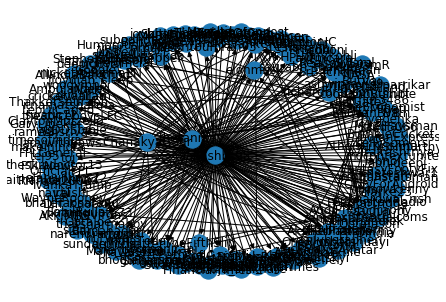

In [29]:
G= nx.DiGraph()
G.add_weighted_edges_from(l)
pos = nx.spring_layout(G,k=5/math.sqrt(G.order()),iterations=20)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()

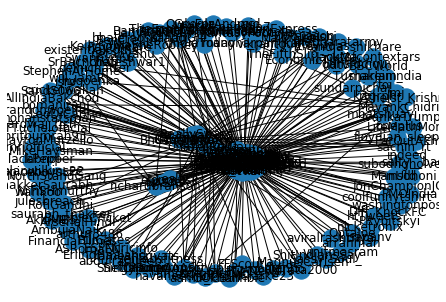

In [30]:
G1=nx.DiGraph.to_undirected(G)
nx.draw(G1,with_labels=True)
plt.draw()
plt.show()

In [31]:
communities_generator = community.girvan_newman(G1)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))


[['ANI',
  'ASRomaEN',
  'Aashishbakhle',
  'AkkiMB5',
  'AksharPathak',
  'AllIndiaBakchod',
  'AmbujaNaik',
  'ArsenalHindi',
  'Atheist_Krishna',
  'AudiPhotography',
  'BBCWorld',
  'BVB',
  'Bamanador',
  'Being_Humor',
  'BenCrellin',
  'Bhuvan_Bam',
  'BigManBakar',
  'BillGates',
  'Brandonwoelfel',
  'BumbleCricket',
  'ButVai',
  'CarryMinati',
  'ChanakyaGaur',
  'ChangiAirport',
  'ClaytonMurzello',
  'Cristiano',
  'DaithankarNinad',
  'Diff_KnockFC',
  'ESPNcricinfo',
  'EconomicTimes',
  'ErlingHaaland',
  'FFH_HQ',
  'FFScout',
  'FPLGeneral',
  'FPL_Partridge',
  'FantasyFootyFix',
  'FarOutAkhtar',
  'FinancialTimes',
  'GappistanRadio',
  'GaryLineker',
  'Google',
  'HumorouslyVipul',
  'IndiaToday',
  'IndianExpress',
  'IvankaTrump',
  'JackMa',
  'JamesClear',
  'Jaspritbumrah93',
  'JonChampionJC',
  'KananGill',
  'KellySomers',
  'LeoDiCaprio',
  'LifeMathMoney',
  'MClarke23',
  'MKBHD',
  'MagnusCarlsen',
  'MajorNeel',
  'ManUtd',
  'MayankChidri',
  'MikeH